In [1]:
import pandas
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import seaborn as sns
import cv2

In [2]:
main_path = "dataset/cifake/"


In [3]:
train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

pneumonia_train_images = glob.glob(train_path+"/FAKE/*.jpg")
normal_train_images = glob.glob(train_path+"/REAL/*.jpg")

pneumonia_test_images = glob.glob(test_path+"/FAKE/*.jpg")
normal_test_images = glob.glob(test_path+"/REAL/*.jpg")

In [4]:
data = pd.DataFrame(np.concatenate([[0]*len(normal_train_images) , [1] *  len(pneumonia_train_images)]),columns=["class"])

# 3. EDA

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Number of cases'}, xlabel='class', ylabel='count'>

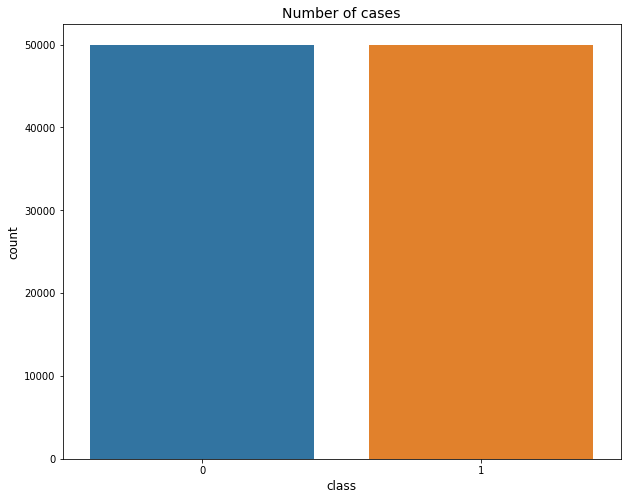

In [5]:
plt.figure(figsize=(10,8))

plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.title('Number of cases', fontsize=14)
sns.countplot(data['class'],data=data)

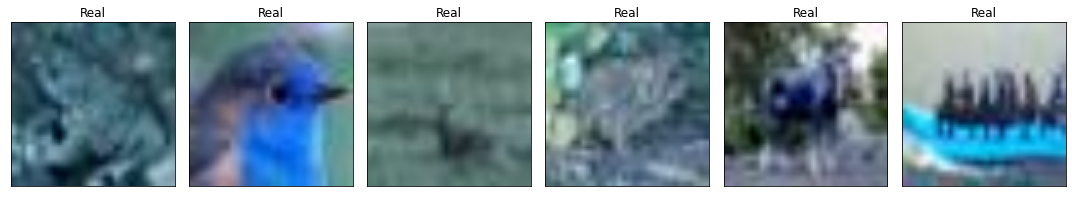

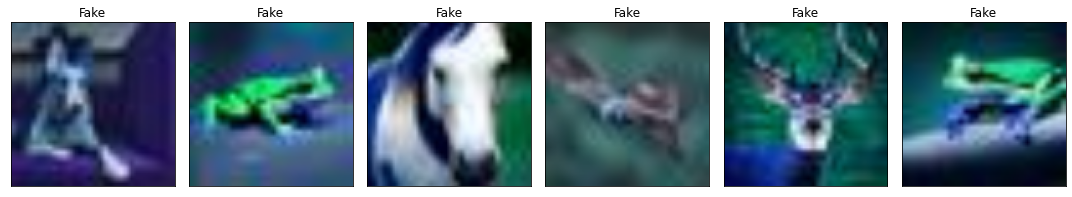

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (100,100))
    ax.imshow(img)
    ax.set_title("Real")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (100,100))
    ax.imshow(img)
    ax.set_title("Fake")
fig.tight_layout()    
plt.show()

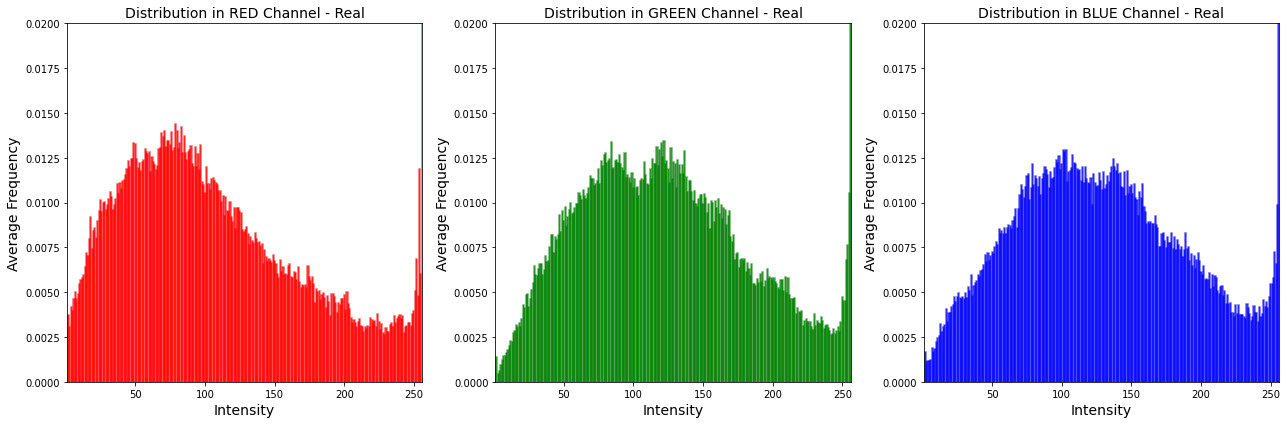

In [7]:
from matplotlib.ticker import AutoMinorLocator
def plot_color_histograms(images, title_suffix):
    bins = np.arange(1, 257) - 0.5
    color_histograms = np.zeros((256, 3))
    
    for img_path in images[:100]:
        img = cv2.imread(img_path)
        if img is not None:
            for i in range(3):
                hist = cv2.calcHist([img], [i], None, [256], [0, 256]).flatten()
                color_histograms[:, i] += hist
    
    color_histograms /= len(images)
    
    plt.figure(figsize=(18, 6))
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        plt.rcParams['axes.facecolor'] = 'white'
        plt.subplot(1, 3, i+1)

        plt.bar(range(1, 257), color_histograms[:, i], color=color, alpha=0.6, edgecolor=color, linewidth=1.5)
        plt.xlim(1, 256)
        plt.title(f'Distribution in {color.upper()} Channel - {title_suffix}')
        plt.xlabel('Intensity',fontsize=14)
        plt.ylabel('Average Frequency',fontsize=14)
        
        plt.grid(False)
    plt.tight_layout()
    plt.show()
    
def plot_color_histograms(images, title_suffix):
    bins = np.arange(1, 257) - 0.5 
    
    color_histograms = np.zeros((256, 3))
    
    for img_path in images[:100]: 
        img = cv2.imread(img_path)
        if img is not None:
            mask = (img != [0, 0, 0]).all(axis=2)
            img_non_black = img[mask]
            
            if img_non_black.size > 0: 
                for i in range(3):
                    hist = cv2.calcHist([img], [i], mask.astype('uint8'), [256], [0, 256]).flatten()
                    color_histograms[:, i] += hist
    
    color_histograms /= len(images)

    plt.figure(figsize=(18, 6))
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        plt.subplot(1, 3, i+1)
        plt.bar(range(1, 257), color_histograms[:, i], color=color, alpha=0.6, edgecolor=color, linewidth=1.5)
        plt.xlim(1, 256)
        plt.ylim(0, 0.02)
        plt.title(f'Distribution in {color.upper()} Channel - {title_suffix}', fontsize=14)
        plt.xlabel('Intensity', fontsize=14)
        plt.ylabel('Average Frequency', fontsize=14)
        plt.grid(False) 
    plt.savefig('real_dist.png')
    plt.tight_layout()
    plt.show()
    

plot_color_histograms(normal_train_images, 'Real')

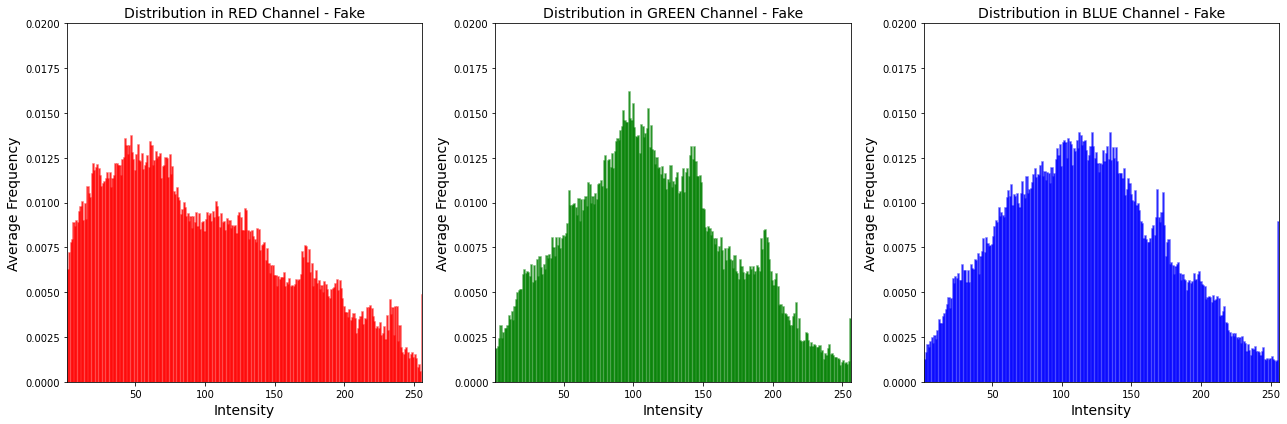

In [8]:
plot_color_histograms(pneumonia_train_images, 'Fake')

For Fake Images :


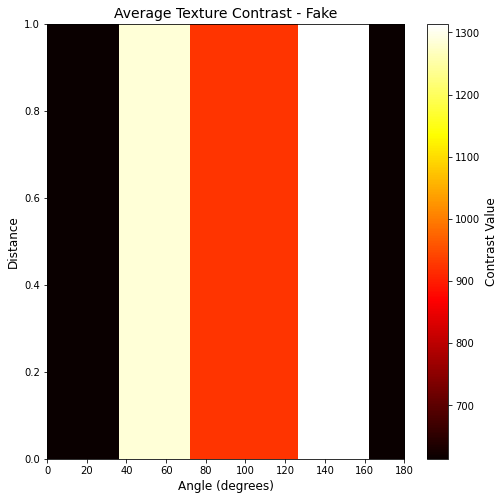

For Real Images :


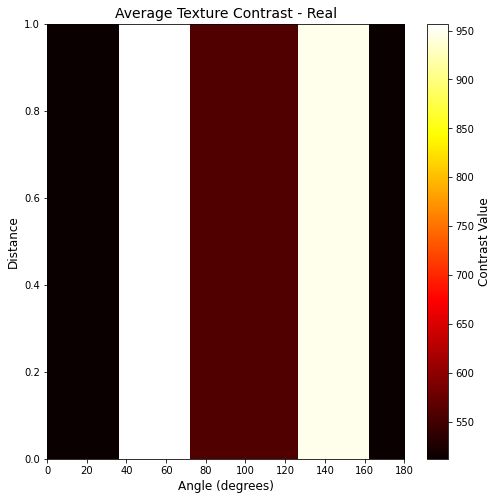

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

def aggregate_texture_analysis(images, title_suffix):
    contrasts = []
    
    for img_path in images[:50]:
        img = cv2.imread(img_path)
        if img is not None:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            glcm = greycomatrix(gray, distances=[1], angles= np.arange(0,np.pi, np.pi/10), levels=256, symmetric=True, normed=True)
            contrast = greycoprops(glcm, 'contrast')
            contrasts.append(contrast)
    
    average_contrast = np.mean(contrasts, axis=0)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(average_contrast, cmap='hot', extent=(0, 180, 0, 1), aspect='auto')
    cbar = plt.colorbar()
    cbar.set_label('Contrast Value', fontsize=12)
    plt.title(f'Average Texture Contrast - {title_suffix}', fontsize=14)
    plt.xlabel('Angle (degrees)', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig('real_texture.png')
    plt.show()

print('For Fake Images :')
aggregate_texture_analysis(pneumonia_train_images, 'Fake')

print('For Real Images :')
aggregate_texture_analysis(normal_train_images, 'Real')



```
About plot:
X-axis (Angle in degrees): The angles (0, 45, 90, and 135 degrees) at which the texture contrast was measured. These angles are typical for GLCM analysis as they represent different orientations of pixel relationships.
Y-axis (Distance): This is typically the pixel distance considered for calculating the GLCM. In this case, the distance seems to be normalized between 0 and 1. It's common to use a distance of 1 for texture analysis, which seems to be the case here.
Color Intensity (Contrast Value): The scale on the right side of the heatmap indicates the contrast value, which is a measure of the variation or 'contrast' between pixel intensities. Higher values suggest more contrast and hence more texture or variation in pixel intensities.



Contrast Values:

In the heatmap for "Fake" images, the contrast values are higher across all angles as indicated by the presence of brighter colors (red to yellow gradient).
The heatmap for "Real" images shows generally lower contrast values (darker colors, mainly red to dark red).

Texture Contrast Variability:

The "Fake" images show a strong variance in contrast with the angle, particularly showing higher contrast values at angles of 90 degrees and above.
The "Real" images display a more uniform texture contrast across different angles but with less contrast overall compared to the "Fake" images.
```

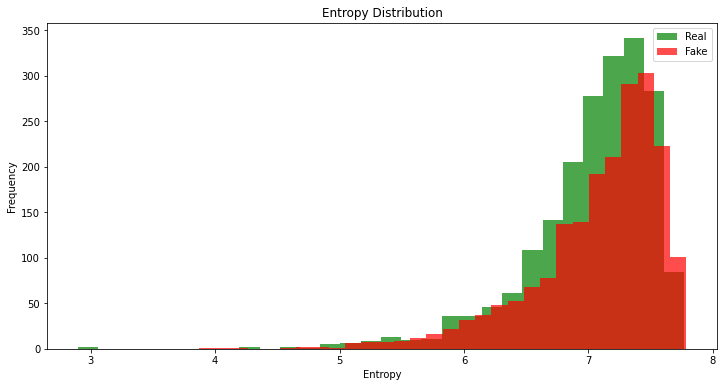

In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def process_images(image_files, labels):
    color_data = {'r': [], 'g': [], 'b': []}
    entropy_data = {'real': [], 'fake': []}

    for img_file, label in zip(image_files, labels):
        image = cv2.imread(img_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        for i, color in enumerate(['r', 'g', 'b']):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            color_data[color].append(hist)

        img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        hist, _ = np.histogram(img_gray, bins=np.arange(0, 256))
        hist = hist / hist.sum()
        entropy = -(hist[hist > 0] * np.log2(hist[hist > 0])).sum()
        if label == 'real':
            entropy_data['real'].append(entropy)
        else:
            entropy_data['fake'].append(entropy)

    return color_data, entropy_data

def plot_color_distributions(color_data):
    plt.figure(figsize=(12, 4))
    for i, color in enumerate(['r', 'g', 'b']):
        plt.subplot(1, 3, i + 1)
        for hist in color_data[color]:
            plt.plot(hist, color=color, alpha=0.5)
        plt.title(f'{color.upper()} channel histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_entropy_distribution(entropy_data):
    plt.figure(figsize=(12, 6))
    plt.hist(entropy_data['real'], bins=30, alpha=0.7, label='Real', color='green')
    plt.hist(entropy_data['fake'], bins=30, alpha=0.7, label='Fake', color='red')
    plt.title('Entropy Distribution')
    plt.xlabel('Entropy')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig('entropy.png')
    plt.show()

i =2000
image_files = [filename for filename in normal_train_images[:i]] + [filename for filename in pneumonia_train_images[:i]]
labels = ['real']*i + ['fake']*i 

color_data, entropy_data = process_images(image_files, labels)
plot_entropy_distribution(entropy_data)


```
the distribution of entropy values for two different sets of images: those labeled as 'Real' and those labeled as 'Fake'. Entropy, in this context, is likely a measure of the amount of information or 'randomness' in the image's pixel values.

From the plot, we can make a few observations:

Overlap Area: There is a significant overlap between the distributions of the 'Real' and 'Fake' images, especially in the middle range of entropy values. This indicates that for this range of entropy, it might be challenging to differentiate between real and fake images based solely on entropy.
Distribution Shift: The peak of the 'Fake' distribution (in red) is shifted slightly to the right compared to the 'Real' distribution (in green). This might suggest that fake images, on average, have a slightly higher entropy. If this is consistent across the dataset, it could imply that fake images generally contain more complexity or noise, which could be a result of the manipulation process.
Range of Entropy: Both types of images seem to have a wide range of entropy values, but 'Real' images might have a slightly tighter distribution. The 'Real' images peak at a lower entropy value and have a steeper fall-off, suggesting less variability in their entropy.
Tails of the Distribution: There seems to be a 'tail' in the 'Fake' images distribution that extends to higher entropy values. This might mean that there are more fake images with high entropy than there are real images with high entropy.
Frequency: The count on the y-axis represents the number of images that fall within each entropy bin. Both categories show a decrease in frequency as entropy increases, but this decrease is sharper for real images.
```